<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(2_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.265881,35.397911,-220.816140,-111.152348,80.799285,-191.951633
1,0.0,1.0,34.338247,63.477948,-520.883872,-413.067678,119.872337,-532.940015
2,0.0,2.0,43.933195,20.137221,-175.863114,-101.792698,65.326220,-167.118917
3,0.0,3.0,34.734896,59.847909,175.141775,279.724580,115.367858,164.356722
4,0.0,4.0,62.763070,92.746988,466.316495,631.826552,151.213184,480.613368
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,40.139899,40.858050,121.103623,212.101572,120.475184,91.626388
249996,999.0,246.0,92.751962,74.203097,156.321980,333.277039,143.667362,189.609677
249997,999.0,247.0,73.514707,38.887212,-95.048822,27.353097,114.495973,-87.142877
249998,999.0,248.0,47.817104,45.347870,202.666315,305.831288,123.523028,182.308261


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    64.265881  35.397911 -220.816140 -111.152348   80.799285   
      1.0    34.338247  63.477948 -520.883872 -413.067678  119.872337   
      2.0    43.933195  20.137221 -175.863114 -101.792698   65.326220   
      3.0    34.734896  59.847909  175.141775  279.724580  115.367858   
      4.0    62.763070  92.746988  466.316495  631.826552  151.213184   
...                ...        ...         ...         ...         ...   
999.0 245.0  40.139899  40.858050  121.103623  212.101572  120.475184   
      246.0  92.751962  74.203097  156.321980  333.277039  143.667362   
      247.0  73.514707  38.887212  -95.048822   27.353097  114.495973   
      248.0  47.817104  45.347870  202.666315  305.831288  123.523028   
      249.0  52.755760  50.220438   58.173987  171.150184  127.259275   

                  e_hat  
rep   index              
0.0   0.0   -191.951633  
      1.0   -532.940015  
      2.0   -167.118917  
      3.0    164.356722  
      4.0    480.613368  
...                 ...  
999.0 245.0   91.626388  
      246.0  189.609677  
      247.0  -87.142877  
      248.0  182.308261  
      249.0   43.890910  

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    64.265881  35.397911 -220.816140 -111.152348   80.799285   
      1.0    34.338247  63.477948 -520.883872 -413.067678  119.872337   
      2.0    43.933195  20.137221 -175.863114 -101.792698   65.326220   
      3.0    34.734896  59.847909  175.141775  279.724580  115.367858   
      4.0    62.763070  92.746988  466.316495  631.826552  151.213184   
...                ...        ...         ...         ...         ...   
999.0 245.0  40.139899  40.858050  121.103623  212.101572  120.475184   
      246.0  92.751962  74.203097  156.321980  333.277039  143.667362   
      247.0  73.514707  38.887212  -95.048822   27.353097  114.495973   
      248.0  47.817104  45.347870  202.666315  305.831288  123.523028   
      249.0  52.755760  50.220438   58.173987  171.150184  127.259275   

                  e_hat  
rep   index              
0.0   0.0   -191.951633  
      1.0   -532.940015  
      2.0   -167.118917  
      3.0    164.356722  
      4.0    480.613368  
...                 ...  
999.0 245.0   91.626388  
      246.0  189.609677  
      247.0  -87.142877  
      248.0  182.308261  
      249.0   43.890910  

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.265881,35.397911,-220.816140,-111.152348,80.799285,-191.951633
1,0.0,1.0,34.338247,63.477948,-520.883872,-413.067678,119.872337,-532.940015
2,0.0,2.0,43.933195,20.137221,-175.863114,-101.792698,65.326220,-167.118917
3,0.0,3.0,34.734896,59.847909,175.141775,279.724580,115.367858,164.356722
4,0.0,4.0,62.763070,92.746988,466.316495,631.826552,151.213184,480.613368
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,40.139899,40.858050,121.103623,212.101572,120.475184,91.626388
249996,999.0,246.0,92.751962,74.203097,156.321980,333.277039,143.667362,189.609677
249997,999.0,247.0,73.514707,38.887212,-95.048822,27.353097,114.495973,-87.142877
249998,999.0,248.0,47.817104,45.347870,202.666315,305.831288,123.523028,182.308261


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    64.265881  35.397911 -220.816140 -111.152348   80.799285   
      1.0    34.338247  63.477948 -520.883872 -413.067678  119.872337   
      2.0    43.933195  20.137221 -175.863114 -101.792698   65.326220   
      3.0    34.734896  59.847909  175.141775  279.724580  115.367858   
      4.0    62.763070  92.746988  466.316495  631.826552  151.213184   
...                ...        ...         ...         ...         ...   
999.0 245.0  40.139899  40.858050  121.103623  212.101572  120.475184   
      246.0  92.751962  74.203097  156.321980  333.277039  143.667362   
      247.0  73.514707  38.887212  -95.048822   27.353097  114.495973   
      248.0  47.817104  45.347870  202.666315  305.831288  123.523028   
      249.0  52.755760  50.220438   58.173987  171.150184  127.259275   

                  e_hat  
rep   index              
0.0   0.0   -191.951633  
      1.0   -532.940015  
      2.0   -167.118917  
      3.0    164.356722  
      4.0    480.613368  
...                 ...  
999.0 245.0   91.626388  
      246.0  189.609677  
      247.0  -87.142877  
      248.0  182.308261  
      249.0   43.890910  

[250000 rows x 6 columns]

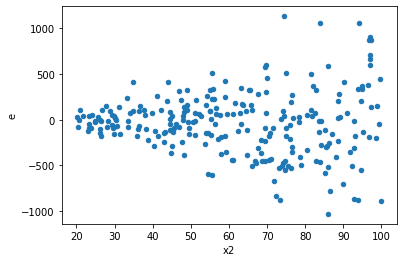

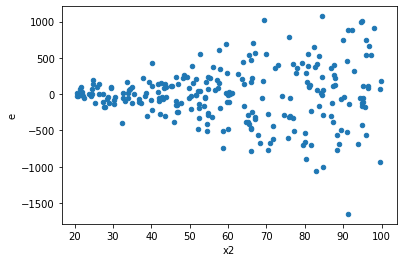

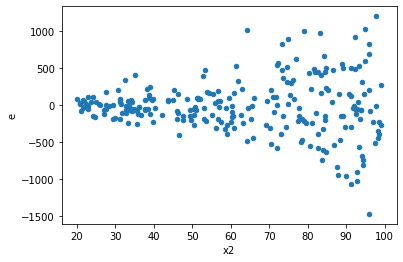

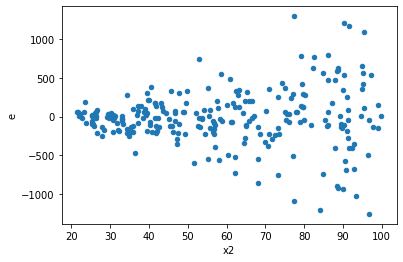

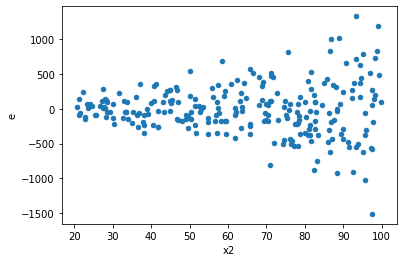

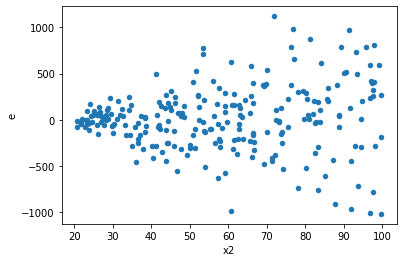

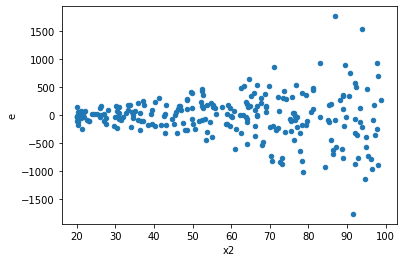

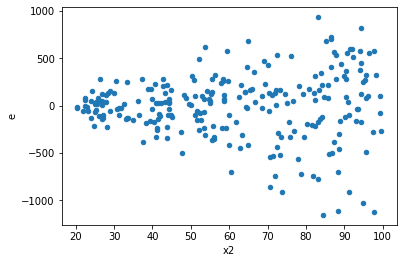

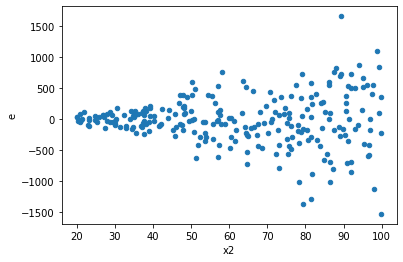

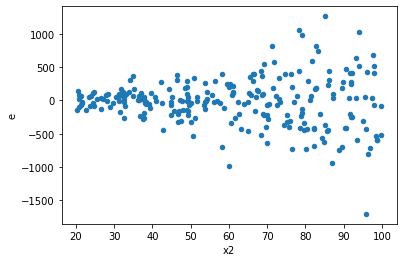

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,125.0,121.0,13062670.933840265,12881487.094435744,104501.36747072212,106458.57102839458,1.0187289755631266,0.9190031747904819,0.5404984126047591,0.45950158739524094,Reject005=1 : Homoscedasticity
6.0,125.0,121.0,15389955.651651116,16161468.826603591,123119.64521320893,133565.85807110407,1.0848460279413996,0.6530860211739682,0.6734569894130159,0.3265430105869841,Reject005=1 : Homoscedasticity
7.0,127.0,119.0,15229400.220921779,17177637.389410164,119916.53717261243,144349.89402865685,1.2037530221613564,0.3067854679150295,0.8466072660424853,0.15339273395751474,Reject005=1 : Homoscedasticity
8.0,117.0,129.0,13620043.845262682,19518395.011271834,116410.6311560913,151305.38768427778,1.2997557541063172,0.1461922653442056,0.9269038673278972,0.0730961326721028,Reject005=1 : Homoscedasticity
9.0,115.0,131.0,10153650.451387178,16865551.57956284,88292.61262075807,128744.66854628122,1.4581590092851398,0.03669456798641968,0.9816527160067902,0.01834728399320984,Reject005=0 : Heteroscedasticity
10.0,137.0,109.0,15810067.710535215,12780546.866643554,115401.95409149792,117252.72354718857,1.0160375919997269,0.9357975437762462,0.5321012281118769,0.4678987718881231,Reject005=1 : Homoscedasticity
11.0,127.0,119.0,18571639.404328506,19026415.571267255,146233.38113644492,159885.84513669962,1.0933607900887972,0.6231401107681269,0.6884299446159365,0.31157005538406346,Reject005=1 : Homoscedasticity
12.0,123.0,123.0,3322410.563934069,30776918.454583675,27011.467999463977,250218.84922425752,9.263430230049805,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
13.0,116.0,130.0,13885065.527920531,18776931.672322728,119698.84075793561,144437.93594094407,1.2066778176493604,0.2971748985906726,0.8514125507046637,0.1485874492953363,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,129.0,117.0,16051727.591885546,14460644.51370151,124431.99683632207,123595.25225385906,0.9932754869829529,0.9679049916135454,Reject005=1 : Homoscedasticity
1.0,128.0,118.0,25382156.14535608,3893563.386882672,198298.0948855944,32996.299888836205,0.1663974629099337,3.3046151044605e-21,Reject005=0 : Heteroscedasticity
2.0,125.0,121.0,19141416.879701264,16506632.64228871,153131.33503761012,136418.4515891629,0.8908591540435378,0.5218630911716047,Reject005=1 : Homoscedasticity
3.0,125.0,121.0,13062670.933840265,12881487.094435744,104501.36747072212,106458.57102839458,1.0187289755631266,0.9190031747904819,Reject005=1 : Homoscedasticity
4.0,116.0,130.0,14877410.163677301,11109456.45379938,128253.53589376983,85457.35733691831,0.6663157997273553,0.026175223861321414,Reject005=0 : Heteroscedasticity
5.0,114.0,132.0,15189902.417391576,12553589.122664385,133244.7580472945,95102.9478989726,0.7137462613367224,0.06505274656980176,Reject005=1 : Homoscedasticity
6.0,125.0,121.0,15389955.651651116,16161468.826603591,123119.64521320893,133565.85807110407,1.0848460279413996,0.6530860211739682,Reject005=1 : Homoscedasticity
7.0,127.0,119.0,15229400.220921779,17177637.389410164,119916.53717261243,144349.89402865685,1.2037530221613564,0.3067854679150295,Reject005=1 : Homoscedasticity
8.0,117.0,129.0,13620043.845262682,19518395.011271834,116410.6311560913,151305.38768427778,1.2997557541063172,0.1461922653442056,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    674
Reject005=1 : Homoscedasticity      326
Name: Result_test, dtype: int64